In [1120]:
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import time

In [1121]:
df = pd.read_csv('atp-rankings.csv.zip', sep = ',', encoding = 'utf-8', low_memory=False)

In [1122]:
df

,ranking,country,player,age,points,tournaments,points_dropping,next_best,date
0,1,SRB,Novak Djokovic,34.0,"8,660",13,0,0,2022-05-16
1,2,RUS,Daniil Medvedev,26.0,"7,980",21,0,0,2022-05-16
2,3,GER,Alexander Zverev,25.0,"7,200",22,125,0,2022-05-16
3,4,GRE,Stefanos Tsitsipas,23.0,"6,170",25,250,45,2022-05-16
4,5,ESP,Rafael Nadal,35.0,"5,525",10,0,0,2022-05-16
...,...,...,...,...,...,...,...,...,...
406961,181,VEN,Humphrey Hose,26.0,0,0,0,0,1973-08-23
406962,182,USA,Franklin Robbins,23.0,0,0,0,0,1973-08-23
406963,183,GBR,David Lloyd,25.0,0,0,0,0,1973-08-23
406964,184,SRB,Nicola Spear,29.0,0,0,0,0,1973-08-23


# How long has Roger Federer been in the top 5?

In [1123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406966 entries, 0 to 406965
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ranking          406966 non-null  object 
 1   country          406966 non-null  object 
 2   player           406966 non-null  object 
 3   age              406612 non-null  float64
 4   points           406966 non-null  object 
 5   tournaments      406966 non-null  int64  
 6   points_dropping  406966 non-null  object 
 7   next_best        406966 non-null  int64  
 8   date             406966 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 27.9+ MB


In [1124]:
type(df['date'][0])

str

In [1125]:
df['date'] = pd.to_datetime(df["date"])
df['date']

0        2022-05-16
1        2022-05-16
2        2022-05-16
3        2022-05-16
4        2022-05-16
            ...    
406961   1973-08-23
406962   1973-08-23
406963   1973-08-23
406964   1973-08-23
406965   1973-08-23
Name: date, Length: 406966, dtype: datetime64[ns]

In [1126]:
type(df['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [1127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406966 entries, 0 to 406965
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   ranking          406966 non-null  object        
 1   country          406966 non-null  object        
 2   player           406966 non-null  object        
 3   age              406612 non-null  float64       
 4   points           406966 non-null  object        
 5   tournaments      406966 non-null  int64         
 6   points_dropping  406966 non-null  object        
 7   next_best        406966 non-null  int64         
 8   date             406966 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 27.9+ MB


In [1128]:
df['ranking'][0]

'1'

In [1129]:
df['ranking'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78',
       '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89',
       '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100',
       '101', '102', '103', '104', '105', '106', '107', '108', '109',
       '110', '111', '112', '113', '114', '115', '116', '117', '118',
       '119', '120', '121', '122', '123', '124', '125', '126', '127',
       '128', '129', '130', '131', '132', '133', '134', '135', '136',
       '137', '138', '139', '140', '141', '142', '143', '144', '1

In [1130]:
df['ranking'] = df['ranking'].replace('T', '', regex = True)

In [1131]:
df['ranking'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78',
       '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89',
       '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100',
       '101', '102', '103', '104', '105', '106', '107', '108', '109',
       '110', '111', '112', '113', '114', '115', '116', '117', '118',
       '119', '120', '121', '122', '123', '124', '125', '126', '127',
       '128', '129', '130', '131', '132', '133', '134', '135', '136',
       '137', '138', '139', '140', '141', '142', '143', '144', '1

In [1132]:
df['points'].unique()

array(['8,660', '7,980', '7,200', ..., '3,162', '2,751', '2,668'],
      dtype=object)

In [1133]:
df['points'] = df['points'].replace(',', '', regex = True)
df['points']

0         8660
1         7980
2         7200
3         6170
4         5525
          ... 
406961       0
406962       0
406963       0
406964       0
406965       0
Name: points, Length: 406966, dtype: object

In [1134]:
df['points_dropping'].unique()

array(['0', '125', '250', '75', '150', '20', '45', '90', '3', '23', '32',
       '51', '10', '12', '50', '48', '17', '68', '112', '25', '15', '5',
       '29', '7', '6', '30', '4', '2', '13', '600', '180', '1,000', '70',
       '300', '360', '16', '115', '35', '84', '205', '58', '95', '103',
       '8', '26', '42', '18', '60', '100', '63', '40', '33', '53', '1',
       '500', '80', '31', '61', '24', '38', '37', '19', '34', '170',
       '102', '98', '65', '55', '11', '14', '9', '375', '126', '47', '96',
       '57', '39', '94', '279', '173', '41', '36', '52', '188', '243',
       '93', '21', '46', '49', '44', '270', '135', '225', '195', '535',
       '342', '200', '92', '86', '87', '22', '320', '162', '110', '240',
       '262', '88', '89', '105', '85', '2,000', '1,200', '970', '330',
       '745', '83', '64', '81', '74', '153', '77', '67', '156', '140',
       '310', '295', '130', '340', '665', '190', '155', '265', '220',
       '145', '400', '2,500', '1,300', '760', '800', '450', '35

In [1135]:
df['points_dropping'] = df['points_dropping'].replace(',', '', regex = True)
df['points_dropping']

0           0
1           0
2         125
3         250
4           0
         ... 
406961      0
406962      0
406963      0
406964      0
406965      0
Name: points_dropping, Length: 406966, dtype: object

In [1136]:
df['points_dropping'] = df['points_dropping'].astype(int)

In [1137]:
df['points'] = df['points'].astype(int)

In [1138]:
df['ranking'] = df['ranking'].astype(int)

In [1139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406966 entries, 0 to 406965
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   ranking          406966 non-null  int32         
 1   country          406966 non-null  object        
 2   player           406966 non-null  object        
 3   age              406612 non-null  float64       
 4   points           406966 non-null  int32         
 5   tournaments      406966 non-null  int64         
 6   points_dropping  406966 non-null  int32         
 7   next_best        406966 non-null  int64         
 8   date             406966 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int32(3), int64(2), object(2)
memory usage: 23.3+ MB


In [1140]:
Roger_Federer = df[df['player'] == 'Roger Federer']
Roger_Federer

,ranking,country,player,age,points,tournaments,points_dropping,next_best,date
45,46,SUI,Roger Federer,40.0,1030,5,0,0,2022-05-16
245,46,SUI,Roger Federer,40.0,1030,5,0,0,2022-05-09
440,41,SUI,Roger Federer,40.0,1120,6,90,0,2022-05-02
640,41,SUI,Roger Federer,40.0,1120,6,0,0,2022-04-25
841,42,SUI,Roger Federer,40.0,1120,6,0,0,2022-04-18
...,...,...,...,...,...,...,...,...,...
224728,129,SUI,Roger Federer,17.0,366,9,0,0,1999-03-08
224928,129,SUI,Roger Federer,17.0,358,8,0,0,1999-03-01
225128,129,SUI,Roger Federer,17.0,358,8,0,0,1999-02-22
225377,178,SUI,Roger Federer,17.0,262,7,0,0,1999-02-15


In [1141]:
roger_top5 = Roger_Federer[Roger_Federer['ranking'] <= 5]
roger_top5

,ranking,country,player,age,points,tournaments,points_dropping,next_best,date
11004,5,SUI,Roger Federer,39.0,6630,16,0,0,2021-03-01
11204,5,SUI,Roger Federer,39.0,6630,16,0,0,2021-02-22
11404,5,SUI,Roger Federer,39.0,6630,16,0,0,2021-02-08
11604,5,SUI,Roger Federer,39.0,6630,16,0,0,2021-02-01
11804,5,SUI,Roger Federer,39.0,6630,16,0,0,2021-01-25
...,...,...,...,...,...,...,...,...,...
183003,4,SUI,Roger Federer,21.0,2780,26,0,0,2003-03-10
183203,4,SUI,Roger Federer,21.0,2780,26,0,0,2003-03-03
183404,5,SUI,Roger Federer,21.0,2580,26,0,0,2003-02-24
183604,5,SUI,Roger Federer,21.0,2530,26,0,0,2003-02-17


In [1142]:
len(roger_top5)

809

In [1143]:
Roger_Federer['time_difference_roger'] = Roger_Federer['date'] - Roger_Federer['date'].shift()
Roger_Federer['time_difference_roger']

C:\Users\klaud\AppData\Local\Temp\ipykernel_29460\2368827017.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Roger_Federer['time_difference_roger'] = Roger_Federer['date'] - Roger_Federer['date'].shift()


45           NaT
245      -7 days
440      -7 days
640      -7 days
841      -7 days
           ...  
224728   -7 days
224928   -7 days
225128   -7 days
225377   -7 days
225571   -7 days
Name: time_difference_roger, Length: 1128, dtype: timedelta64[ns]

In [1144]:
Roger_Federer['time_difference_roger'].cumsum()

45                                  NaT
245      106744 days 23:47:16.854775808
440      106737 days 23:47:16.854775808
640      106730 days 23:47:16.854775808
841      106723 days 23:47:16.854775808
                      ...              
224728    98281 days 23:47:16.854775808
224928    98274 days 23:47:16.854775808
225128    98267 days 23:47:16.854775808
225377    98260 days 23:47:16.854775808
225571    98253 days 23:47:16.854775808
Name: time_difference_roger, Length: 1128, dtype: timedelta64[ns]

In [1145]:
Roger_Federer['time_difference_roger'].value_counts()

-7 days      1061
-14 days       65
-161 days       1
Name: time_difference_roger, dtype: int64

In [1146]:
Roger_Federer['cumtimes'] = Roger_Federer['date'].cumsum()
Roger_Federer['cumtimes']

C:\Users\klaud\AppData\Local\Temp\ipykernel_29460\2893918336.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Roger_Federer['cumtimes'] = Roger_Federer['date'].cumsum()


45       2022-05-16 00:00:00.000000000
245      2074-09-21 00:00:00.000000000
440      2127-01-21 00:00:00.000000000
640      2179-05-15 00:00:00.000000000
841      2231-08-31 00:00:00.000000000
                      ...             
224728   2230-06-20 08:38:44.364525568
224928   2259-08-18 08:38:44.364525568
225128   1704-03-20 09:04:10.654973952
225377   1733-05-04 09:04:10.654973952
225571   1762-06-11 09:04:10.654973952
Name: cumtimes, Length: 1128, dtype: datetime64[ns]

In [1147]:
Roger_Federer

,ranking,country,player,age,points,tournaments,points_dropping,next_best,date,time_difference_roger,cumtimes
45,46,SUI,Roger Federer,40.0,1030,5,0,0,2022-05-16,NaT,2022-05-16 00:00:00.000000000
245,46,SUI,Roger Federer,40.0,1030,5,0,0,2022-05-09,-7 days,2074-09-21 00:00:00.000000000
440,41,SUI,Roger Federer,40.0,1120,6,90,0,2022-05-02,-7 days,2127-01-21 00:00:00.000000000
640,41,SUI,Roger Federer,40.0,1120,6,0,0,2022-04-25,-7 days,2179-05-15 00:00:00.000000000
841,42,SUI,Roger Federer,40.0,1120,6,0,0,2022-04-18,-7 days,2231-08-31 00:00:00.000000000
...,...,...,...,...,...,...,...,...,...,...,...
224728,129,SUI,Roger Federer,17.0,366,9,0,0,1999-03-08,-7 days,2230-06-20 08:38:44.364525568
224928,129,SUI,Roger Federer,17.0,358,8,0,0,1999-03-01,-7 days,2259-08-18 08:38:44.364525568
225128,129,SUI,Roger Federer,17.0,358,8,0,0,1999-02-22,-7 days,1704-03-20 09:04:10.654973952
225377,178,SUI,Roger Federer,17.0,262,7,0,0,1999-02-15,-7 days,1733-05-04 09:04:10.654973952


# 2)Which player(s) has/have been in the top 100 the last 15 years consequently every week?

In [1148]:
df

,ranking,country,player,age,points,tournaments,points_dropping,next_best,date
0,1,SRB,Novak Djokovic,34.0,8660,13,0,0,2022-05-16
1,2,RUS,Daniil Medvedev,26.0,7980,21,0,0,2022-05-16
2,3,GER,Alexander Zverev,25.0,7200,22,125,0,2022-05-16
3,4,GRE,Stefanos Tsitsipas,23.0,6170,25,250,45,2022-05-16
4,5,ESP,Rafael Nadal,35.0,5525,10,0,0,2022-05-16
...,...,...,...,...,...,...,...,...,...
406961,181,VEN,Humphrey Hose,26.0,0,0,0,0,1973-08-23
406962,182,USA,Franklin Robbins,23.0,0,0,0,0,1973-08-23
406963,183,GBR,David Lloyd,25.0,0,0,0,0,1973-08-23
406964,184,SRB,Nicola Spear,29.0,0,0,0,0,1973-08-23


In [1149]:
df_100 = df[(df['ranking'] <= 100)]

In [1150]:
df_100

,ranking,country,player,age,points,tournaments,points_dropping,next_best,date
0,1,SRB,Novak Djokovic,34.0,8660,13,0,0,2022-05-16
1,2,RUS,Daniil Medvedev,26.0,7980,21,0,0,2022-05-16
2,3,GER,Alexander Zverev,25.0,7200,22,125,0,2022-05-16
3,4,GRE,Stefanos Tsitsipas,23.0,6170,25,250,45,2022-05-16
4,5,ESP,Rafael Nadal,35.0,5525,10,0,0,2022-05-16
...,...,...,...,...,...,...,...,...,...
406875,96,CZE,Vladimir Zednik,26.0,0,0,0,0,1973-08-23
406876,97,CHI,Patricio Cornejo,29.0,0,0,0,0,1973-08-23
406877,98,HUN,Szabolcz Baranyi,29.0,0,0,0,0,1973-08-23
406878,98,CRO,Zeljko Franulovic,26.0,0,0,0,0,1973-08-23


In [1151]:
df_100["time_difference"] = pd.to_timedelta(df_100['date'].max() - df_100["date"])
df_100["time_difference"]

C:\Users\klaud\AppData\Local\Temp\ipykernel_29460\801916477.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_100["time_difference"] = pd.to_timedelta(df_100['date'].max() - df_100["date"])


0            0 days
1            0 days
2            0 days
3            0 days
4            0 days
            ...    
406875   17798 days
406876   17798 days
406877   17798 days
406878   17798 days
406879   17798 days
Name: time_difference, Length: 219569, dtype: timedelta64[ns]

In [1152]:
df_100['diff_year'] = df_100["time_difference"] / np.timedelta64(1, 'Y')

C:\Users\klaud\AppData\Local\Temp\ipykernel_29460\751494822.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_100['diff_year'] = df_100["time_difference"] / np.timedelta64(1, 'Y')


In [1153]:
df_100_15_years = df_100[(df_100['diff_year'] <= 15)]
df_100_15_years

,ranking,country,player,age,points,tournaments,points_dropping,next_best,date,time_difference,diff_year
0,1,SRB,Novak Djokovic,34.0,8660,13,0,0,2022-05-16,0 days,0.000000
1,2,RUS,Daniil Medvedev,26.0,7980,21,0,0,2022-05-16,0 days,0.000000
2,3,GER,Alexander Zverev,25.0,7200,22,125,0,2022-05-16,0 days,0.000000
3,4,GRE,Stefanos Tsitsipas,23.0,6170,25,250,45,2022-05-16,0 days,0.000000
4,5,ESP,Rafael Nadal,35.0,5525,10,0,0,2022-05-16,0 days,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
139295,96,CZE,Lukas Dlouhy,24.0,429,24,0,0,2007-05-21,5474 days,14.987303
139296,97,ARG,Diego Hartfield,26.0,426,25,0,0,2007-05-21,5474 days,14.987303
139297,98,ARG,Carlos Berlocq,24.0,424,25,0,0,2007-05-21,5474 days,14.987303
139298,99,AUT,Alexander Peya,26.0,423,21,0,0,2007-05-21,5474 days,14.987303


In [1154]:
df_100_15_years[df_100_15_years['player'] == 'Novak Djokovic']

,ranking,country,player,age,points,tournaments,points_dropping,next_best,date,time_difference,diff_year
0,1,SRB,Novak Djokovic,34.0,8660,13,0,0,2022-05-16,0 days,0.000000
200,1,SRB,Novak Djokovic,34.0,8260,13,600,0,2022-05-09,7 days,0.019165
400,1,SRB,Novak Djokovic,34.0,8400,13,500,0,2022-05-02,14 days,0.038331
600,1,SRB,Novak Djokovic,34.0,8400,13,0,0,2022-04-25,21 days,0.057496
800,1,SRB,Novak Djokovic,34.0,8340,13,90,0,2022-04-18,28 days,0.076661
...,...,...,...,...,...,...,...,...,...,...,...
138404,5,SRB,Novak Djokovic,20.0,3010,23,0,0,2007-06-18,5446 days,14.910642
138603,4,SRB,Novak Djokovic,20.0,3010,22,0,0,2007-06-11,5453 days,14.929807
138805,6,SRB,Novak Djokovic,20.0,2810,22,0,0,2007-06-04,5460 days,14.948972
139005,6,SRB,Novak Djokovic,20.0,2810,22,0,0,2007-05-28,5467 days,14.968138


# 3)How has Stefanos Tsitsipas progressed in the last 3 years?


In [1155]:
df

,ranking,country,player,age,points,tournaments,points_dropping,next_best,date
0,1,SRB,Novak Djokovic,34.0,8660,13,0,0,2022-05-16
1,2,RUS,Daniil Medvedev,26.0,7980,21,0,0,2022-05-16
2,3,GER,Alexander Zverev,25.0,7200,22,125,0,2022-05-16
3,4,GRE,Stefanos Tsitsipas,23.0,6170,25,250,45,2022-05-16
4,5,ESP,Rafael Nadal,35.0,5525,10,0,0,2022-05-16
...,...,...,...,...,...,...,...,...,...
406961,181,VEN,Humphrey Hose,26.0,0,0,0,0,1973-08-23
406962,182,USA,Franklin Robbins,23.0,0,0,0,0,1973-08-23
406963,183,GBR,David Lloyd,25.0,0,0,0,0,1973-08-23
406964,184,SRB,Nicola Spear,29.0,0,0,0,0,1973-08-23


In [1156]:
Stefanos_Tsitsipas = df[df['player'] == 'Stefanos Tsitsipas']
Stefanos_Tsitsipas

,ranking,country,player,age,points,tournaments,points_dropping,next_best,date
3,4,GRE,Stefanos Tsitsipas,23.0,6170,25,250,45,2022-05-16
204,5,GRE,Stefanos Tsitsipas,23.0,5750,25,180,45,2022-05-09
404,5,GRE,Stefanos Tsitsipas,23.0,5690,25,300,45,2022-05-02
604,5,GRE,Stefanos Tsitsipas,23.0,5770,26,125,45,2022-04-25
804,5,GRE,Stefanos Tsitsipas,23.0,5980,26,300,45,2022-04-18
...,...,...,...,...,...,...,...,...,...
42391,192,GRE,Stefanos Tsitsipas,18.0,281,27,0,0,2017-06-12
42990,191,GRE,Stefanos Tsitsipas,18.0,281,28,18,1,2017-05-15
43997,198,GRE,Stefanos Tsitsipas,18.0,275,26,0,0,2017-04-10
45595,196,GRE,Stefanos Tsitsipas,18.0,280,23,13,1,2017-01-30


In [1157]:
Stefanos_Tsitsipas['diff_time'] = pd.to_timedelta(Stefanos_Tsitsipas['date'].max() - Stefanos_Tsitsipas['date'])
Stefanos_Tsitsipas['diff_time']

C:\Users\klaud\AppData\Local\Temp\ipykernel_29460\2681852587.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Stefanos_Tsitsipas['diff_time'] = pd.to_timedelta(Stefanos_Tsitsipas['date'].max() - Stefanos_Tsitsipas['date'])


3          0 days
204        7 days
404       14 days
604       21 days
804       28 days
           ...   
42391   1799 days
42990   1827 days
43997   1862 days
45595   1932 days
47999   2023 days
Name: diff_time, Length: 216, dtype: timedelta64[ns]

In [1158]:
Stefanos_Tsitsipas['diff_year'] = Stefanos_Tsitsipas["diff_time"] / np.timedelta64(1, 'Y')
Stefanos_Tsitsipas['diff_year']

C:\Users\klaud\AppData\Local\Temp\ipykernel_29460\35491415.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Stefanos_Tsitsipas['diff_year'] = Stefanos_Tsitsipas["diff_time"] / np.timedelta64(1, 'Y')


3        0.000000
204      0.019165
404      0.038331
604      0.057496
804      0.076661
           ...   
42391    4.925495
42990    5.002156
43997    5.097983
45595    5.289636
47999    5.538786
Name: diff_year, Length: 216, dtype: float64

In [1159]:
Stefanos_Tsitsipas_3_years = Stefanos_Tsitsipas[(Stefanos_Tsitsipas['diff_year'] <=3 )]
Stefanos_Tsitsipas_3_years

,ranking,country,player,age,points,tournaments,points_dropping,next_best,date,diff_time,diff_year
3,4,GRE,Stefanos Tsitsipas,23.0,6170,25,250,45,2022-05-16,0 days,0.000000
204,5,GRE,Stefanos Tsitsipas,23.0,5750,25,180,45,2022-05-09,7 days,0.019165
404,5,GRE,Stefanos Tsitsipas,23.0,5690,25,300,45,2022-05-02,14 days,0.038331
604,5,GRE,Stefanos Tsitsipas,23.0,5770,26,125,45,2022-04-25,21 days,0.057496
804,5,GRE,Stefanos Tsitsipas,23.0,5980,26,300,45,2022-04-18,28 days,0.076661
...,...,...,...,...,...,...,...,...,...,...,...
23005,6,GRE,Stefanos Tsitsipas,20.0,4215,28,0,0,2019-06-24,1057 days,2.893968
23205,6,GRE,Stefanos Tsitsipas,20.0,4215,28,0,0,2019-06-17,1064 days,2.913133
23405,6,GRE,Stefanos Tsitsipas,20.0,4215,28,0,0,2019-06-10,1071 days,2.932298
23605,6,GRE,Stefanos Tsitsipas,20.0,4080,28,45,90,2019-05-27,1085 days,2.970629


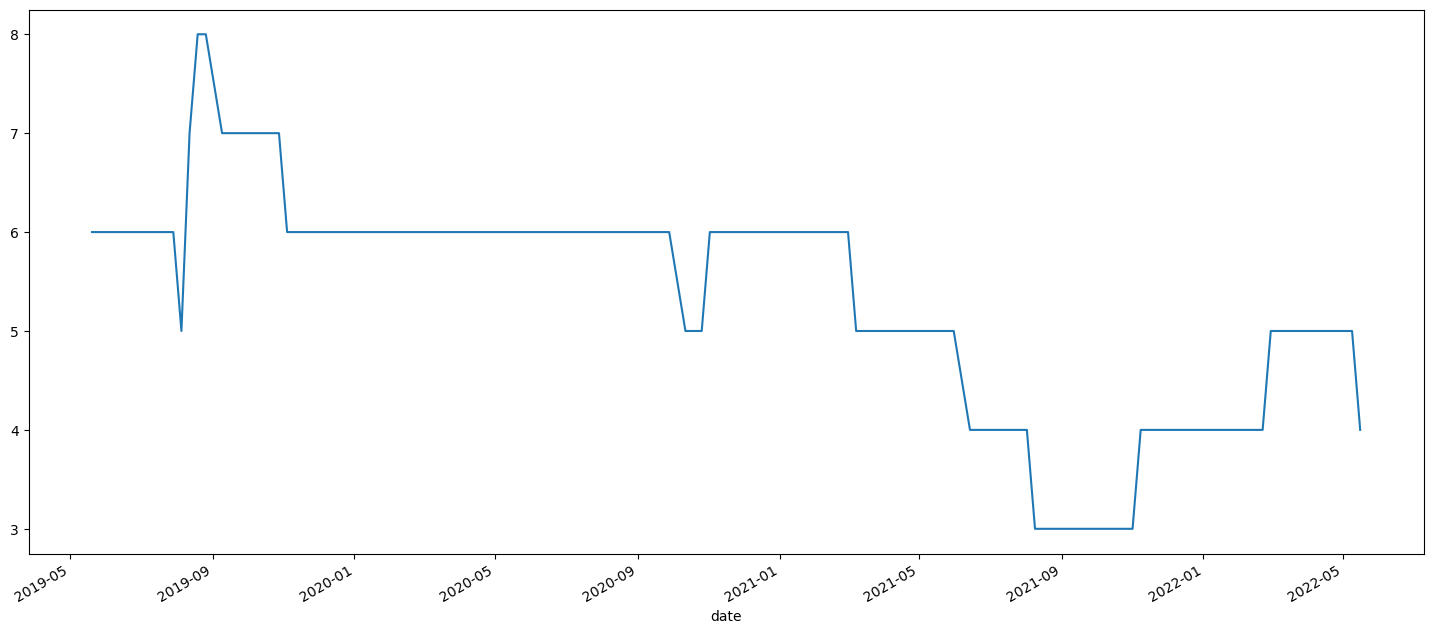

In [1160]:
Stefanos_Tsitsipas_3_years.groupby('date')['ranking'].mean().plot(figsize=(18,8))
None

# 4)Who's the youngest player ever to reach the top 10?

In [1161]:
df

,ranking,country,player,age,points,tournaments,points_dropping,next_best,date
0,1,SRB,Novak Djokovic,34.0,8660,13,0,0,2022-05-16
1,2,RUS,Daniil Medvedev,26.0,7980,21,0,0,2022-05-16
2,3,GER,Alexander Zverev,25.0,7200,22,125,0,2022-05-16
3,4,GRE,Stefanos Tsitsipas,23.0,6170,25,250,45,2022-05-16
4,5,ESP,Rafael Nadal,35.0,5525,10,0,0,2022-05-16
...,...,...,...,...,...,...,...,...,...
406961,181,VEN,Humphrey Hose,26.0,0,0,0,0,1973-08-23
406962,182,USA,Franklin Robbins,23.0,0,0,0,0,1973-08-23
406963,183,GBR,David Lloyd,25.0,0,0,0,0,1973-08-23
406964,184,SRB,Nicola Spear,29.0,0,0,0,0,1973-08-23


In [1162]:
df_10_top = df[(df['ranking'] <= 10)]
df_10_top

,ranking,country,player,age,points,tournaments,points_dropping,next_best,date
0,1,SRB,Novak Djokovic,34.0,8660,13,0,0,2022-05-16
1,2,RUS,Daniil Medvedev,26.0,7980,21,0,0,2022-05-16
2,3,GER,Alexander Zverev,25.0,7200,22,125,0,2022-05-16
3,4,GRE,Stefanos Tsitsipas,23.0,6170,25,250,45,2022-05-16
4,5,ESP,Rafael Nadal,35.0,5525,10,0,0,2022-05-16
...,...,...,...,...,...,...,...,...,...
406785,6,AUS,Ken Rosewall,38.0,0,0,0,0,1973-08-23
406786,7,AUS,John Newcombe,29.0,0,0,0,0,1973-08-23
406787,8,ITA,Adriano Panatta,23.0,0,0,0,0,1973-08-23
406788,9,NED,Tom Okker,29.0,0,0,0,0,1973-08-23


In [1163]:
df_10_top.sort_values('age', ascending=True).head(1)

,ranking,country,player,age,points,tournaments,points_dropping,next_best,date
361786,10,USA,Aaron Krickstein,17.0,0,0,0,0,1985-02-18


In [1164]:
df_10_top.sort_values('age', ascending=True)

,ranking,country,player,age,points,tournaments,points_dropping,next_best,date
361786,10,USA,Aaron Krickstein,17.0,0,0,0,0,1985-02-18
355572,5,GER,Boris Becker,17.0,0,0,0,0,1985-11-11
355772,5,GER,Boris Becker,17.0,0,0,0,0,1985-10-28
355972,5,GER,Boris Becker,17.0,0,0,0,0,1985-10-21
356172,5,GER,Boris Becker,17.0,0,0,0,0,1985-10-14
...,...,...,...,...,...,...,...,...,...
401862,6,AUS,Ken Rosewall,41.0,0,0,0,0,1975-11-16
401358,7,AUS,Ken Rosewall,41.0,0,0,0,0,1976-03-29
400247,10,AUS,Ken Rosewall,41.0,0,0,0,0,1976-07-26
401459,7,AUS,Ken Rosewall,41.0,0,0,0,0,1976-03-18


# 5)BONUS: What's the most catastrophic ranking drop a player ever suffered from one year to another?

In [1165]:
df = df.copy()

In [1166]:
df

,ranking,country,player,age,points,tournaments,points_dropping,next_best,date
0,1,SRB,Novak Djokovic,34.0,8660,13,0,0,2022-05-16
1,2,RUS,Daniil Medvedev,26.0,7980,21,0,0,2022-05-16
2,3,GER,Alexander Zverev,25.0,7200,22,125,0,2022-05-16
3,4,GRE,Stefanos Tsitsipas,23.0,6170,25,250,45,2022-05-16
4,5,ESP,Rafael Nadal,35.0,5525,10,0,0,2022-05-16
...,...,...,...,...,...,...,...,...,...
406961,181,VEN,Humphrey Hose,26.0,0,0,0,0,1973-08-23
406962,182,USA,Franklin Robbins,23.0,0,0,0,0,1973-08-23
406963,183,GBR,David Lloyd,25.0,0,0,0,0,1973-08-23
406964,184,SRB,Nicola Spear,29.0,0,0,0,0,1973-08-23


In [1167]:
df['year'] = pd.DatetimeIndex(df['date']).year

In [1168]:
df

,ranking,country,player,age,points,tournaments,points_dropping,next_best,date,year
0,1,SRB,Novak Djokovic,34.0,8660,13,0,0,2022-05-16,2022
1,2,RUS,Daniil Medvedev,26.0,7980,21,0,0,2022-05-16,2022
2,3,GER,Alexander Zverev,25.0,7200,22,125,0,2022-05-16,2022
3,4,GRE,Stefanos Tsitsipas,23.0,6170,25,250,45,2022-05-16,2022
4,5,ESP,Rafael Nadal,35.0,5525,10,0,0,2022-05-16,2022
...,...,...,...,...,...,...,...,...,...,...
406961,181,VEN,Humphrey Hose,26.0,0,0,0,0,1973-08-23,1973
406962,182,USA,Franklin Robbins,23.0,0,0,0,0,1973-08-23,1973
406963,183,GBR,David Lloyd,25.0,0,0,0,0,1973-08-23,1973
406964,184,SRB,Nicola Spear,29.0,0,0,0,0,1973-08-23,1973


In [1169]:
#df.index = df['year']

In [1170]:
df

,ranking,country,player,age,points,tournaments,points_dropping,next_best,date,year
0,1,SRB,Novak Djokovic,34.0,8660,13,0,0,2022-05-16,2022
1,2,RUS,Daniil Medvedev,26.0,7980,21,0,0,2022-05-16,2022
2,3,GER,Alexander Zverev,25.0,7200,22,125,0,2022-05-16,2022
3,4,GRE,Stefanos Tsitsipas,23.0,6170,25,250,45,2022-05-16,2022
4,5,ESP,Rafael Nadal,35.0,5525,10,0,0,2022-05-16,2022
...,...,...,...,...,...,...,...,...,...,...
406961,181,VEN,Humphrey Hose,26.0,0,0,0,0,1973-08-23,1973
406962,182,USA,Franklin Robbins,23.0,0,0,0,0,1973-08-23,1973
406963,183,GBR,David Lloyd,25.0,0,0,0,0,1973-08-23,1973
406964,184,SRB,Nicola Spear,29.0,0,0,0,0,1973-08-23,1973


In [1174]:
df_new = df.groupby(['player', 'year']).agg({"ranking": "mean"}).reset_index()
df_new

,player,year,ranking
0,Aaron Krickstein,1983,94.888889
1,Aaron Krickstein,1984,42.818182
2,Aaron Krickstein,1985,18.500000
3,Aaron Krickstein,1986,32.243902
4,Aaron Krickstein,1987,35.372093
...,...,...,...
12820,Zoltan Kuharszky,1982,83.545455
12821,Zoltan Kuharszky,1983,96.846154
12822,Zoltan Kuharszky,1984,71.575000
12823,Zoltan Kuharszky,1985,115.086957


In [1179]:
column_names = ['player', 'year', 'ranking', 'shift']

rank_flagged = pd.DataFrame(columns = column_names)

for item in df_new['player'].unique():
    temp_df = df_new[df_new['player'] == item].sort_values(['year'])
    temp_df["shift"] = temp_df["year"] - temp_df["year"].shift(1)
    rank_flagged = pd.concat([rank_flagged, temp_df])
    #rank_flagged = rank_flagged.append(temp_df, ignore_index=True)

In [1180]:
rank_flagged

,player,year,ranking,shift
0,Aaron Krickstein,1983,94.888889,NaN
1,Aaron Krickstein,1984,42.818182,1.0
2,Aaron Krickstein,1985,18.500000,1.0
3,Aaron Krickstein,1986,32.243902,1.0
4,Aaron Krickstein,1987,35.372093,1.0
...,...,...,...,...
12820,Zoltan Kuharszky,1982,83.545455,NaN
12821,Zoltan Kuharszky,1983,96.846154,1.0
12822,Zoltan Kuharszky,1984,71.575000,1.0
12823,Zoltan Kuharszky,1985,115.086957,1.0


In [1186]:
rank_flagged["shift"]

0        NaN
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
12820    NaN
12821    1.0
12822    1.0
12823    1.0
12824    NaN
Name: shift, Length: 12825, dtype: float64

In [1189]:
rank_flagged.duplicated("player") == False

0         True
1        False
2        False
3        False
4        False
         ...  
12820     True
12821    False
12822    False
12823    False
12824     True
Length: 12825, dtype: bool

In [1190]:
rank_flagged["shift"][rank_flagged.duplicated("player") == False]

0       NaN
14      NaN
19      NaN
21      NaN
26      NaN
         ..
12813   NaN
12815   NaN
12818   NaN
12820   NaN
12824   NaN
Name: shift, Length: 2021, dtype: float64

In [1191]:
rank_flagged["shift"][rank_flagged.duplicated("player") == False] = np.nan

C:\Users\klaud\AppData\Local\Temp\ipykernel_29460\3279317489.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rank_flagged["shift"][rank_flagged.duplicated("player") == False] = np.nan


In [1192]:
rank_flagged

,index,player,year,ranking,shift
0,0,Aaron Krickstein,1983,94.888889,NaN
1,1,Aaron Krickstein,1984,42.818182,1.0
2,2,Aaron Krickstein,1985,18.500000,1.0
3,3,Aaron Krickstein,1986,32.243902,1.0
4,4,Aaron Krickstein,1987,35.372093,1.0
...,...,...,...,...,...
12820,12820,Zoltan Kuharszky,1982,83.545455,NaN
12821,12821,Zoltan Kuharszky,1983,96.846154,1.0
12822,12822,Zoltan Kuharszky,1984,71.575000,1.0
12823,12823,Zoltan Kuharszky,1985,115.086957,1.0


In [1195]:
rank_flagged = rank_flagged.reset_index()
rank_flagged

ValueError: cannot insert level_0, already exists

In [1196]:
rank_flagged

,level_0,index,player,year,ranking,shift
0,0,0,Aaron Krickstein,1983,94.888889,NaN
1,1,1,Aaron Krickstein,1984,42.818182,1.0
2,2,2,Aaron Krickstein,1985,18.500000,1.0
3,3,3,Aaron Krickstein,1986,32.243902,1.0
4,4,4,Aaron Krickstein,1987,35.372093,1.0
...,...,...,...,...,...,...
12820,12820,12820,Zoltan Kuharszky,1982,83.545455,NaN
12821,12821,12821,Zoltan Kuharszky,1983,96.846154,1.0
12822,12822,12822,Zoltan Kuharszky,1984,71.575000,1.0
12823,12823,12823,Zoltan Kuharszky,1985,115.086957,1.0


In [1204]:
rank_flagged.loc[i, "shift"] == 1

False

In [1197]:
rank_flagged.shape

(12825, 6)

In [1198]:
for i in range(1, len(rank_flagged)):
    if rank_flagged.loc[i, "shift"] == 1:
        try:
            rank_flagged.loc[i, 'ranking_diff'] = rank_flagged.loc[i, 'ranking'] - rank_flagged.loc[i-1, 'ranking']
        except:
            rank_flagged.loc[i, 'ranking_diff'] = np.nan
    else:
        rank_flagged.loc[i, 'ranking_diff'] = np.nan

In [1199]:
rank_flagged

,level_0,index,player,year,ranking,shift,ranking_diff
0,0,0,Aaron Krickstein,1983,94.888889,NaN,NaN
1,1,1,Aaron Krickstein,1984,42.818182,1.0,-52.070707
2,2,2,Aaron Krickstein,1985,18.500000,1.0,-24.318182
3,3,3,Aaron Krickstein,1986,32.243902,1.0,13.743902
4,4,4,Aaron Krickstein,1987,35.372093,1.0,3.128191
...,...,...,...,...,...,...,...
12820,12820,12820,Zoltan Kuharszky,1982,83.545455,NaN,NaN
12821,12821,12821,Zoltan Kuharszky,1983,96.846154,1.0,13.300699
12822,12822,12822,Zoltan Kuharszky,1984,71.575000,1.0,-25.271154
12823,12823,12823,Zoltan Kuharszky,1985,115.086957,1.0,43.511957


In [1205]:
rank_flagged['ranking_diff'] = rank_flagged['ranking'] - rank_flagged['ranking'].shift()

In [1206]:
rank_flagged

,level_0,index,player,year,ranking,shift,ranking_diff
0,0,0,Aaron Krickstein,1983,94.888889,NaN,NaN
1,1,1,Aaron Krickstein,1984,42.818182,1.0,-52.070707
2,2,2,Aaron Krickstein,1985,18.500000,1.0,-24.318182
3,3,3,Aaron Krickstein,1986,32.243902,1.0,13.743902
4,4,4,Aaron Krickstein,1987,35.372093,1.0,3.128191
...,...,...,...,...,...,...,...
12820,12820,12820,Zoltan Kuharszky,1982,83.545455,NaN,-103.866310
12821,12821,12821,Zoltan Kuharszky,1983,96.846154,1.0,13.300699
12822,12822,12822,Zoltan Kuharszky,1984,71.575000,1.0,-25.271154
12823,12823,12823,Zoltan Kuharszky,1985,115.086957,1.0,43.511957


In [1200]:
rankdrop_df2 = rank_flagged[rank_flagged["ranking_diff"] == rank_flagged["ranking_diff"].max()]
rankdrop_df2

,level_0,index,player,year,ranking,shift,ranking_diff
5962,5962,5962,Joachim Johansson,2006,154.8125,1.0,132.947115


In [1202]:
print("The player with the most catastrophic average ranking drop ({} ranks) was {} between {} and {}."\
      .format(int(rankdrop_df2["ranking_diff"].tolist()[0]), rankdrop_df2["player"].tolist()[0],\
    rankdrop_df2["year"].tolist()[0] - 1, rankdrop_df2["year"].tolist()[0]))

The player with the most catastrophic average ranking drop (132 ranks) was Joachim Johansson between 2005 and 2006.
